Image Generation
=========

Packages

In [1]:
from tqdm import tqdm
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as tt
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from torchsummary import summary
import imageio
import glob
import glob
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image

Parameters

In [11]:
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")
print("Using device:",device)
print(torch.cuda.get_device_name(0))

latent_size=100

Using device: cuda
NVIDIA GeForce RTX 3060 Ti


Generator Network
--------

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_size, 1024, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(True),

            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [4]:
netG_normal = Generator().to(device)
netG_covid = Generator().to(device)

Load Network
-------

In [5]:
netG_normal=torch.load("models/GAN_netG_normal.pt")
netG_covid=torch.load("models/GAN_netG_covid.pt")

Generate images
---------

Two examples of generated iages of each class

torch.Size([128, 128])


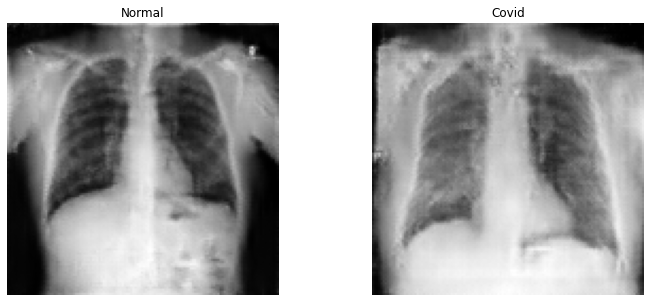

In [16]:
plt.figure(figsize=(12,5))

dat_normal=netG_normal(torch.randn(64,latent_size,1,1, device=device)).detach().cpu()
dat_covid=netG_covid(torch.randn(64,latent_size,1,1, device=device)).detach().cpu()
plt.subplot(121)
plt.title("Normal")
print(dat_normal[0][0].shape)
plt.imshow(np.transpose(vutils.make_grid(dat_normal[0], padding=2, normalize=True),(1,2,0)))
plt.axis("off")
plt.subplot(122)
plt.title("Covid")
plt.imshow(np.transpose(vutils.make_grid(dat_covid[0], padding=2, normalize=True),(1,2,0)))
plt.axis("off")
plt.show()


Generate Covid Images

In [19]:
num_fig=5000 # Number of generated figures

for i in range(num_fig):
    dat=netG_covid(torch.randn(64, latent_size, 1, 1, device=device)).detach().cpu().numpy()[0][0] # Generate image
    rescaled = ((dat+1)/2*255).astype(np.uint8) # Rescale it to save it to save it in png format


    im = Image.fromarray(rescaled)
    im.save("data/Covid_data_GENERATED/GENERATED/COVID-G-{y}.png".format(y=i)) # Save image

Generate Normal Images

In [20]:
num_fig=5000 # Number of generated figures

for i in range(num_fig):
    dat=netG_normal(torch.randn(64, latent_size, 1, 1, device=device)).detach().cpu().numpy()[0][0] # Generate image
    rescaled = ((dat+1)/2*255).astype(np.uint8) # Rescale it to save it to save it in png format

    im = Image.fromarray(rescaled)
    im.save("data/Normal_data_GENERATED/GENERATED/Normal-G-{y}.png".format(y=i)) # Save image